# Mask R-CNN - Inspect Balloon Training Data

Inspect and visualize data loading and pre-processing code.

In [3]:
import numpy as np
np.random.choice(np.arange(1,10), 3)

array([9, 3, 2])

In [ ]:
import random
random.choice()

In [2]:
import os
from skimage import io
import sys
import itertools
import math
import logging
import json
import re
import random
from collections import OrderedDict
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.lines as lines
from matplotlib.patches import Polygon

# Root directory of the project
ROOT_DIR = os.path.abspath("../../")

# Import Mask RCNN
sys.path.append(ROOT_DIR)  # To find local version of the library
from mrcnn import utils
from mrcnn import visualize
from mrcnn.visualize import display_images
import mrcnn.model as modellib
from mrcnn.model import log

from samples.dic import dic
from samples.custo import custo
%matplotlib inline 

D:\Anaconda\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


## Configurations

Configurations are defined in balloon.py

In [5]:
config = custo.CustoConfig()
FLUO_DIR = r'G:\DataForDL\data\cell_tracking_cha\export\fluo_n2dh'

## Dataset

In [8]:
# Load dataset
# Get the dataset from the releases page
# https://github.com/matterport/Mask_RCNN/releases
subset = 'valid'
dataset = custo.CustoDataset()
dataset.load_custo(FLUO_DIR, subset)

# Must call before using the dataset
dataset.prepare()

print("Image Count: {}".format(len(dataset.image_ids)))
print("Class Count: {}".format(dataset.num_classes))
for i, info in enumerate(dataset.class_info):
    print("{:3}. {:50}".format(i, info['name']))


Image Count: 56
Class Count: 2
  0. BG                                                
  1. custo                                             


## Display Samples

Load and display images and masks.

In [9]:
# name dic val pictures by number of instances
from os.path import join

to_path = r'G:\DataForDL\data\cell_tracking_cha\export\dic_sample'
for image_id in dataset.image_ids:
    image = dataset.load_image(image_id)
    mask, class_ids = dataset.load_mask(image_id)
    new_name = '{}_{}.png'.format(image_id, len(class_ids))
    io.imsave(join(to_path, new_name), image)
    

In [9]:
# save img and masks for unet evaluation
path = r'G:\DataForDL\data\cell_tracking_cha\export\fluo_n2dh_multi_mask\{}'.format(subset)
for folder in ['images', 'masks']:
    if not os.path.exists(os.path.join(path, folder)):
        os.makedirs(os.path.join(path, folder), exist_ok=True)

imgs, masks = [], []
for image_id in dataset.image_ids:
    img = dataset.load_image(image_id)
    mask, _ = dataset.load_mask(image_id)
    np.save(r'G:\DataForDL\data\cell_tracking_cha\export\fluo_n2dh_multi_mask\{}\images\{}.npy'.format(subset, image_id), img)
    np.save(r'G:\DataForDL\data\cell_tracking_cha\export\fluo_n2dh_multi_mask\{}\masks\{}.npy'.format(subset, image_id), mask)

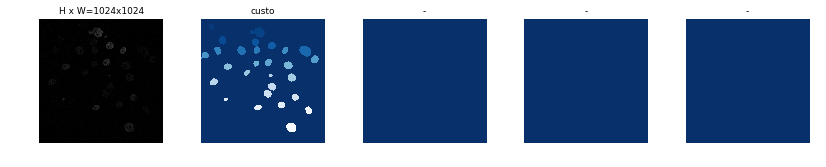

(1024, 1024, 3) (1024, 1024, 28) 28


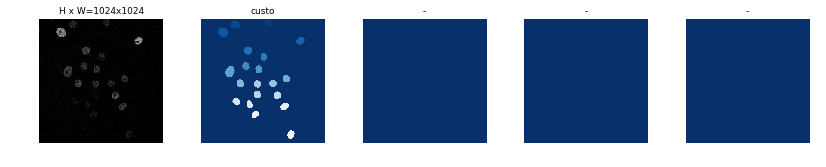

(1024, 1024, 3) (1024, 1024, 20) 20


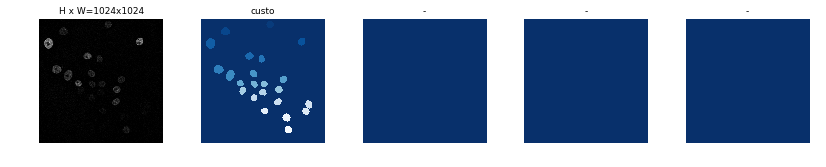

(1024, 1024, 3) (1024, 1024, 23) 23


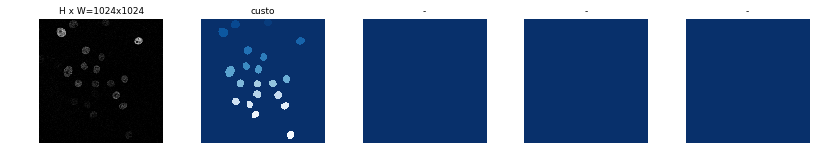

(1024, 1024, 3) (1024, 1024, 20) 20


In [10]:
# Load and display random samples
image_ids = np.random.choice(dataset.image_ids, 4)
for image_id in image_ids:
    image = dataset.load_image(image_id)
    mask, class_ids = dataset.load_mask(image_id)
    visualize.display_top_masks(image, mask, class_ids, dataset.class_names)
    print(image.shape, mask.shape, len(class_ids))

In [6]:
from os.path import join

In [19]:
res = json.load(open(join(DIC_DIR, 'train/via_export_json.json')))
res = list(res.values())
res

[{'filename': 't002.png',
  'size': 3828,
  'regions': [{'shape_attributes': {'name': 'polygon',
     'all_points_x': [273, 246, 206, 214, 270, 317, 342, 350],
     'all_points_y': [3, 22, 37, 53, 84, 73, 51, 1]},
    'region_attributes': {}},
   {'shape_attributes': {'name': 'polygon',
     'all_points_x': [174, 110, 88, 90, 102, 119, 188, 228, 242, 235, 207],
     'all_points_y': [145, 164, 204, 233, 248, 256, 251, 239, 208, 173, 151]},
    'region_attributes': {}},
   {'shape_attributes': {'name': 'polygon',
     'all_points_x': [67, 58, 38, 33, 33, 47, 73, 105, 126, 142, 135, 105, 82],
     'all_points_y': [287,
      296,
      340,
      370,
      395,
      440,
      468,
      470,
      449,
      410,
      361,
      310,
      288]},
    'region_attributes': {}},
   {'shape_attributes': {'name': 'polygon',
     'all_points_x': [210,
      235,
      249,
      256,
      262,
      250,
      214,
      184,
      147,
      108,
      91,
      124],
     'all_points_y':

In [26]:
file_name = res[0]['filename']
img = io.imread(join(DIC_DIR, 'train', file_name))

polygons = res[0]['regions']
polygons = [v['shape_attributes'] for v in polygons]
polygons

[{'name': 'polygon',
  'all_points_x': [273, 246, 206, 214, 270, 317, 342, 350],
  'all_points_y': [3, 22, 37, 53, 84, 73, 51, 1]},
 {'name': 'polygon',
  'all_points_x': [174, 110, 88, 90, 102, 119, 188, 228, 242, 235, 207],
  'all_points_y': [145, 164, 204, 233, 248, 256, 251, 239, 208, 173, 151]},
 {'name': 'polygon',
  'all_points_x': [67, 58, 38, 33, 33, 47, 73, 105, 126, 142, 135, 105, 82],
  'all_points_y': [287,
   296,
   340,
   370,
   395,
   440,
   468,
   470,
   449,
   410,
   361,
   310,
   288]},
 {'name': 'polygon',
  'all_points_x': [210, 235, 249, 256, 262, 250, 214, 184, 147, 108, 91, 124],
  'all_points_y': [258,
   281,
   295,
   323,
   343,
   356,
   355,
   350,
   335,
   308,
   280,
   260]},
 {'name': 'polygon',
  'all_points_x': [509, 465, 434, 443, 461, 482, 489, 510],
  'all_points_y': [12, 23, 40, 72, 100, 113, 115, 105]},
 {'name': 'polygon',
  'all_points_x': [290,
   346,
   390,
   427,
   452,
   470,
   482,
   474,
   451,
   434,
   426,
 

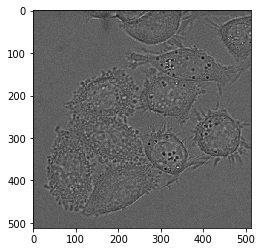

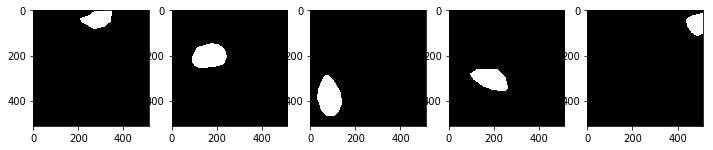

In [32]:
import skimage
mask = np.zeros([img.shape[0], img.shape[1], len(polygons)], dtype=np.uint8)
plt.imshow(img, cmap='gray')
fig, axes = plt.subplots(1,min(5, len(polygons)), figsize=(12,6))
for i, p in enumerate(polygons):
    if i>=5:
        break
    # Get indexes of pixels inside the polygon and set them to 1
    rr, cc = skimage.draw.polygon(p['all_points_y'], p['all_points_x'])
    mask[rr, cc, i] = 1
    axes[i].imshow(mask[:,:,i], cmap='gray')
plt.show()